In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [6]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [7]:
dataset = pd.read_csv('./datasets/Concrete Compressive Strength.csv')
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [10]:
dataset.isnull().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

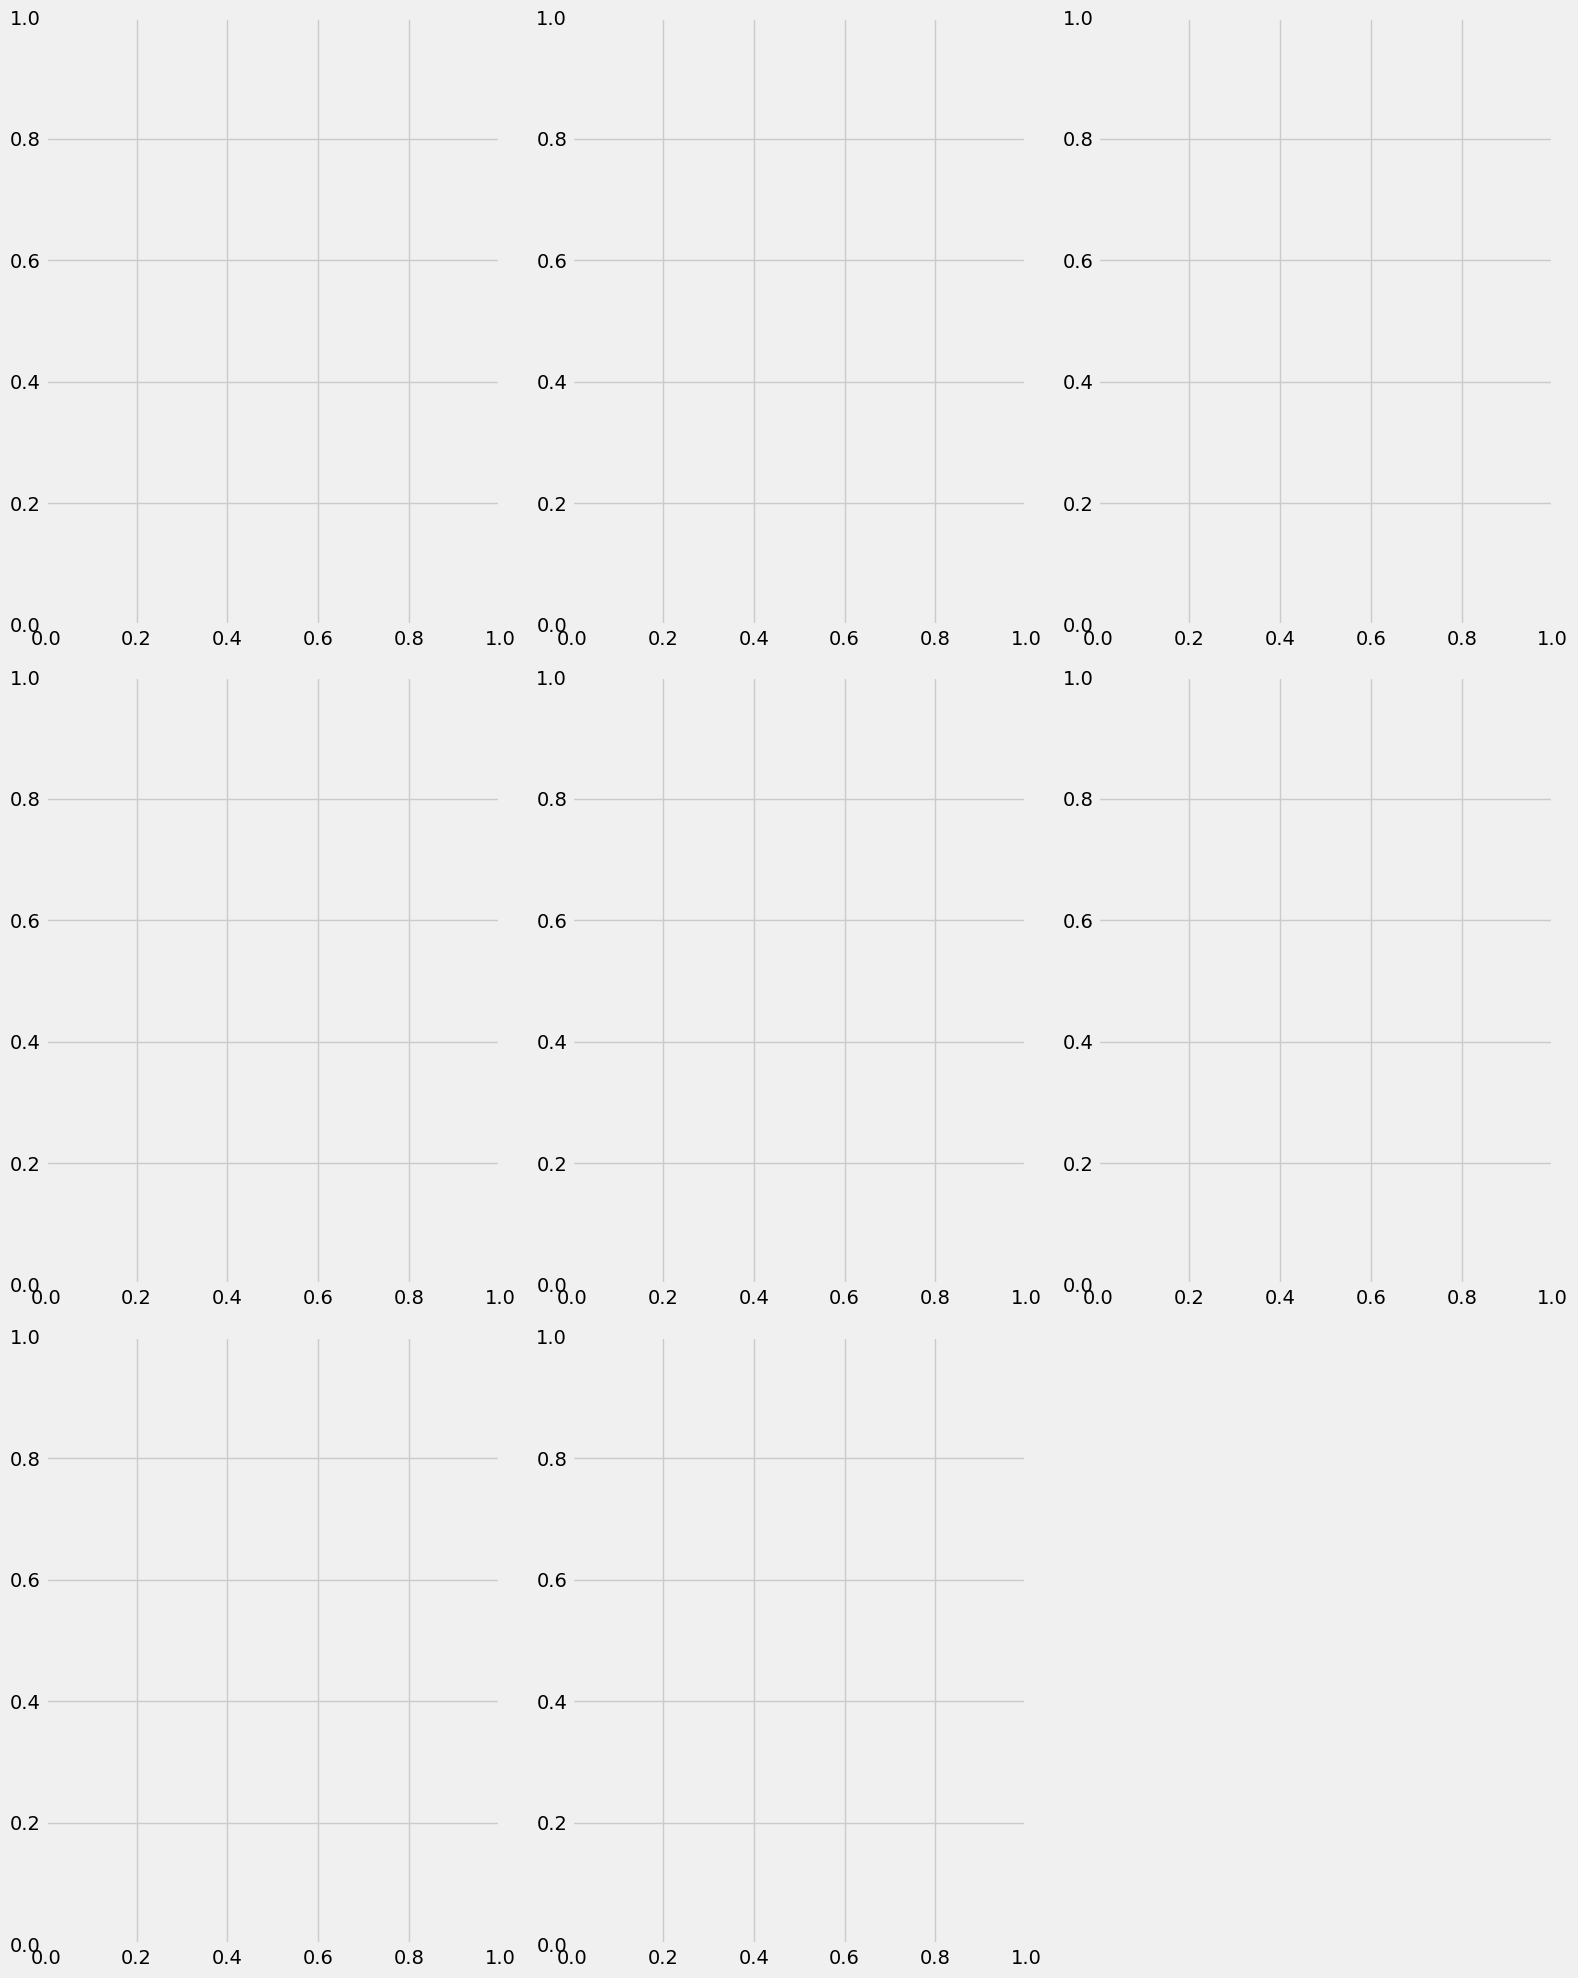

In [14]:
# Outlier Detection
columns = dataset.columns
plt.figure(figsize=(16, 20))
plotnumber = 1

for i in range(1, len(columns)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(y = columns[i], data=dataset, ax=ax)
        plt.title(columns[i], fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

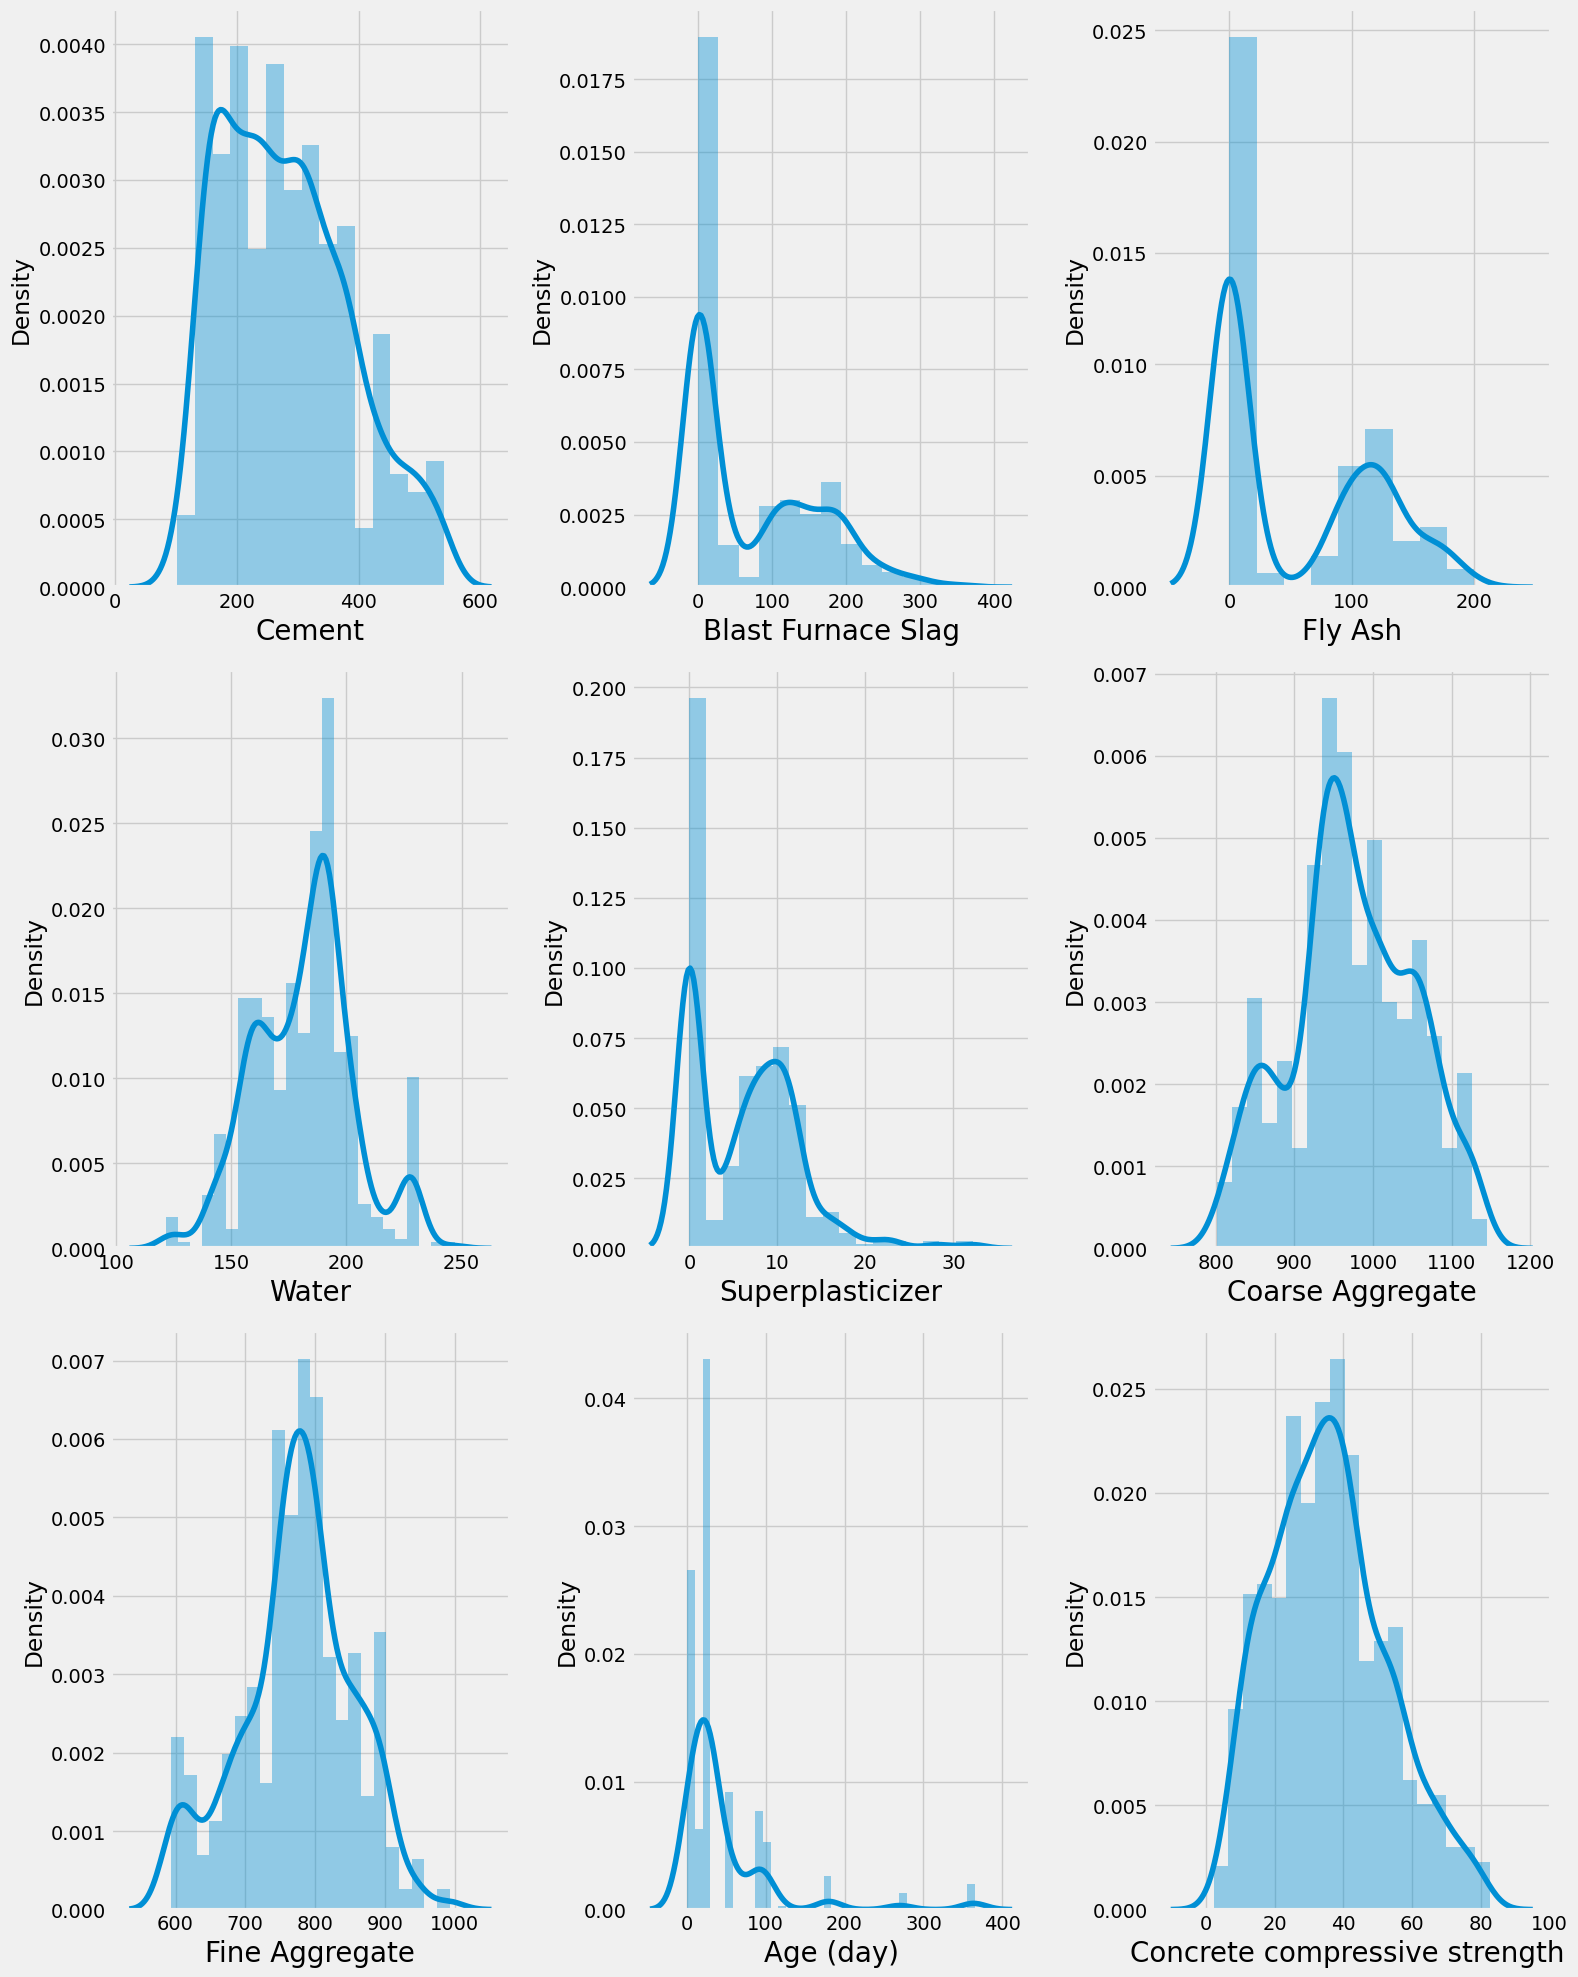

In [14]:
plt.figure(figsize=(16, 20))
plotnumber = 1

for col in dataset.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(dataset[col])
        plt.xlabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

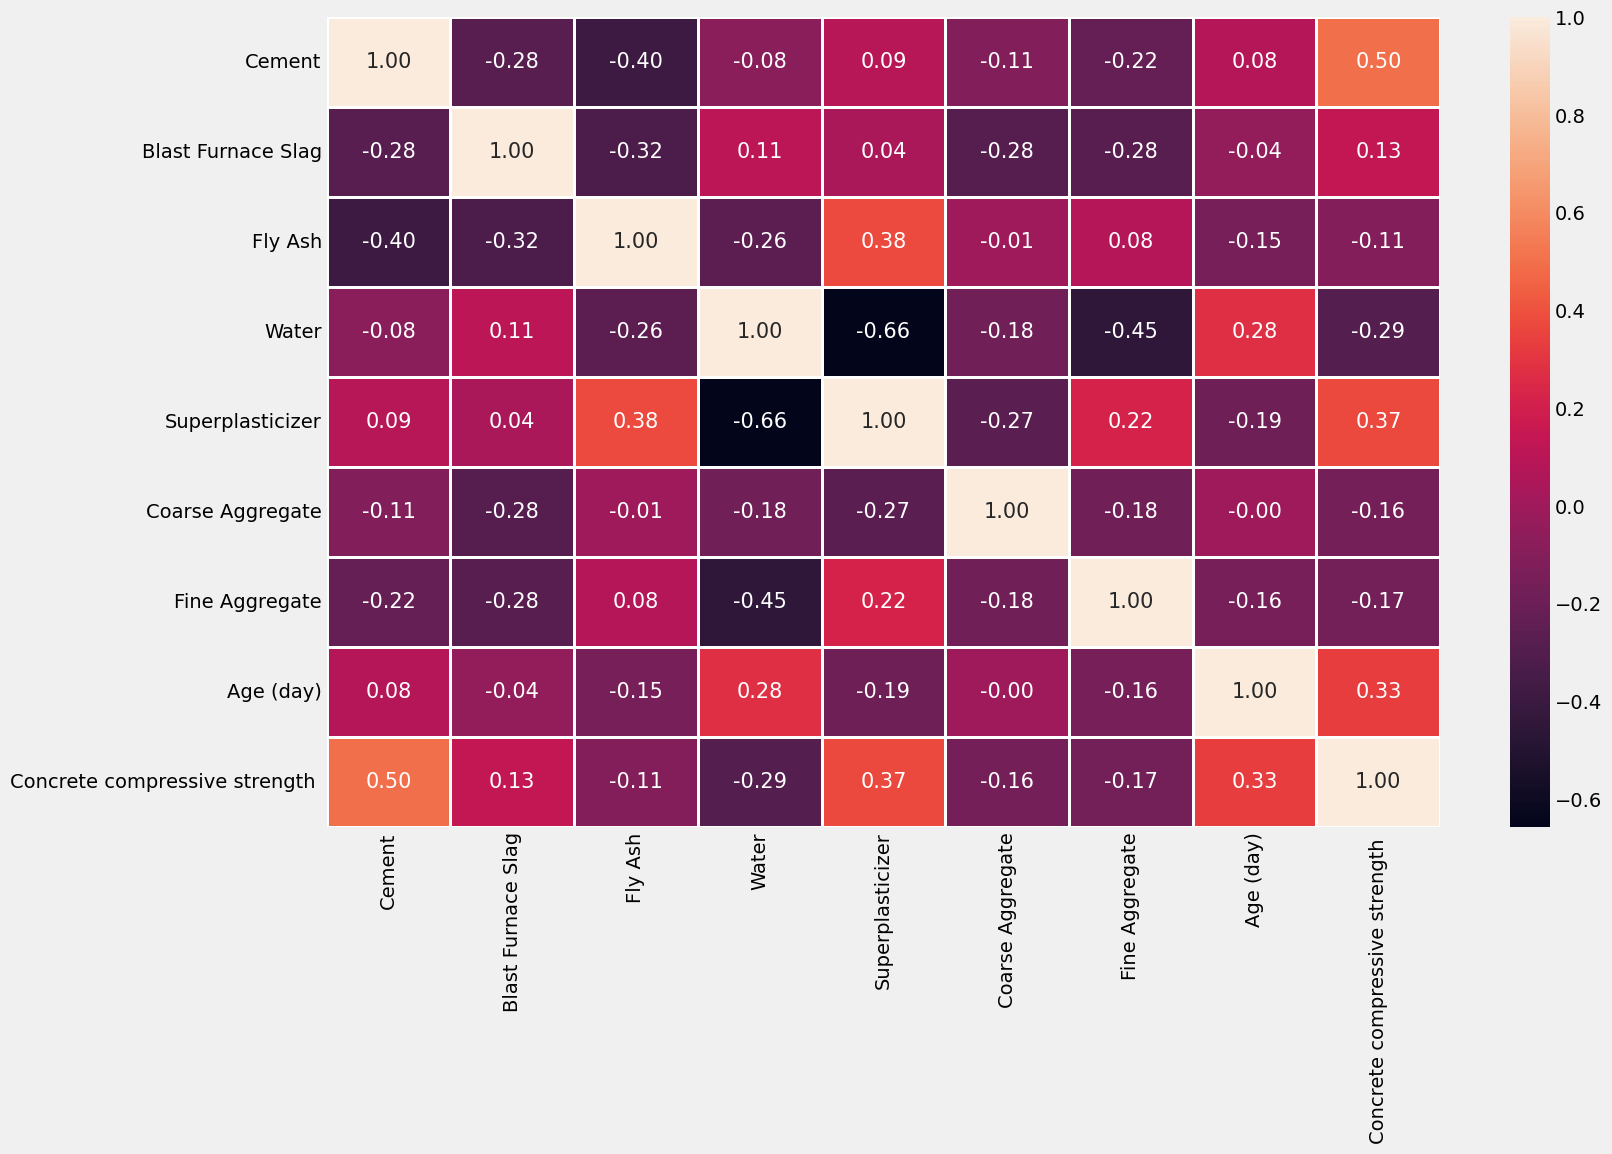

In [17]:
# Correlation Analysis

plt.figure(figsize=(16, 10))
sns.heatmap(dataset.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()


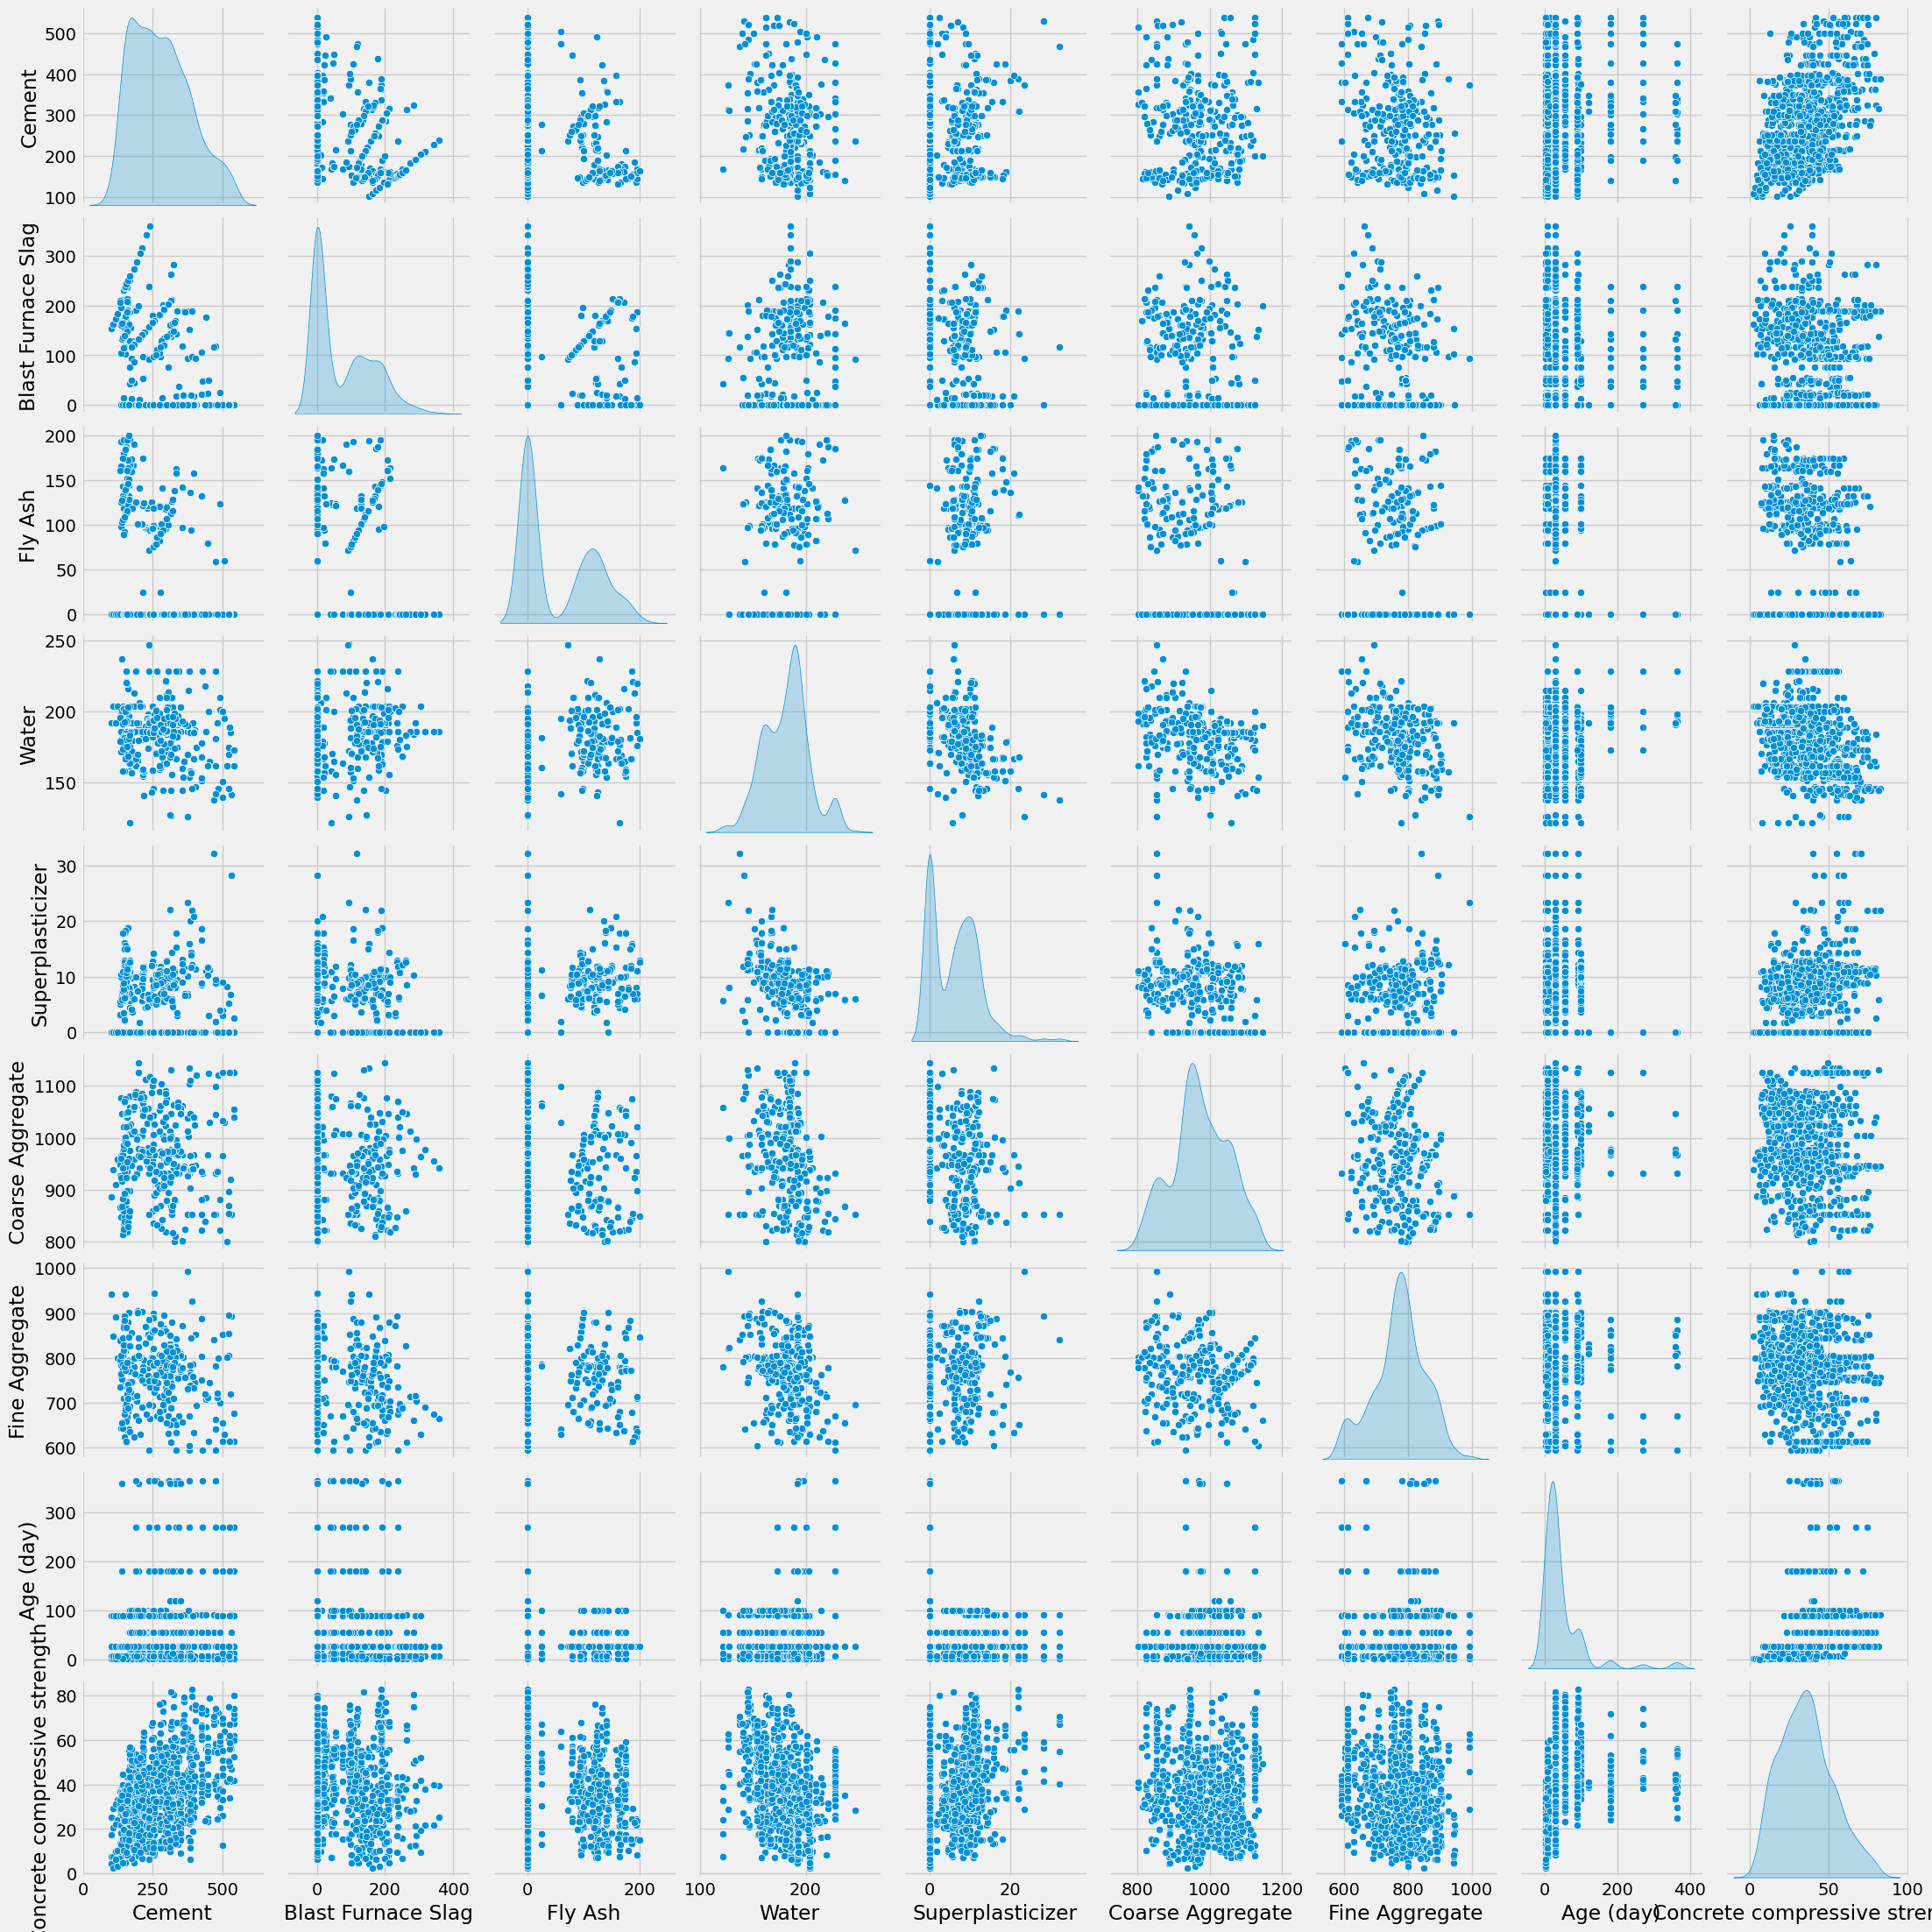

In [19]:
sns.pairplot(dataset, diag_kind='kde')
plt.show()

In [20]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [23]:
for column in x.columns:
    x[column] = x[column] + 1
    x[column] = np.log(x[column])

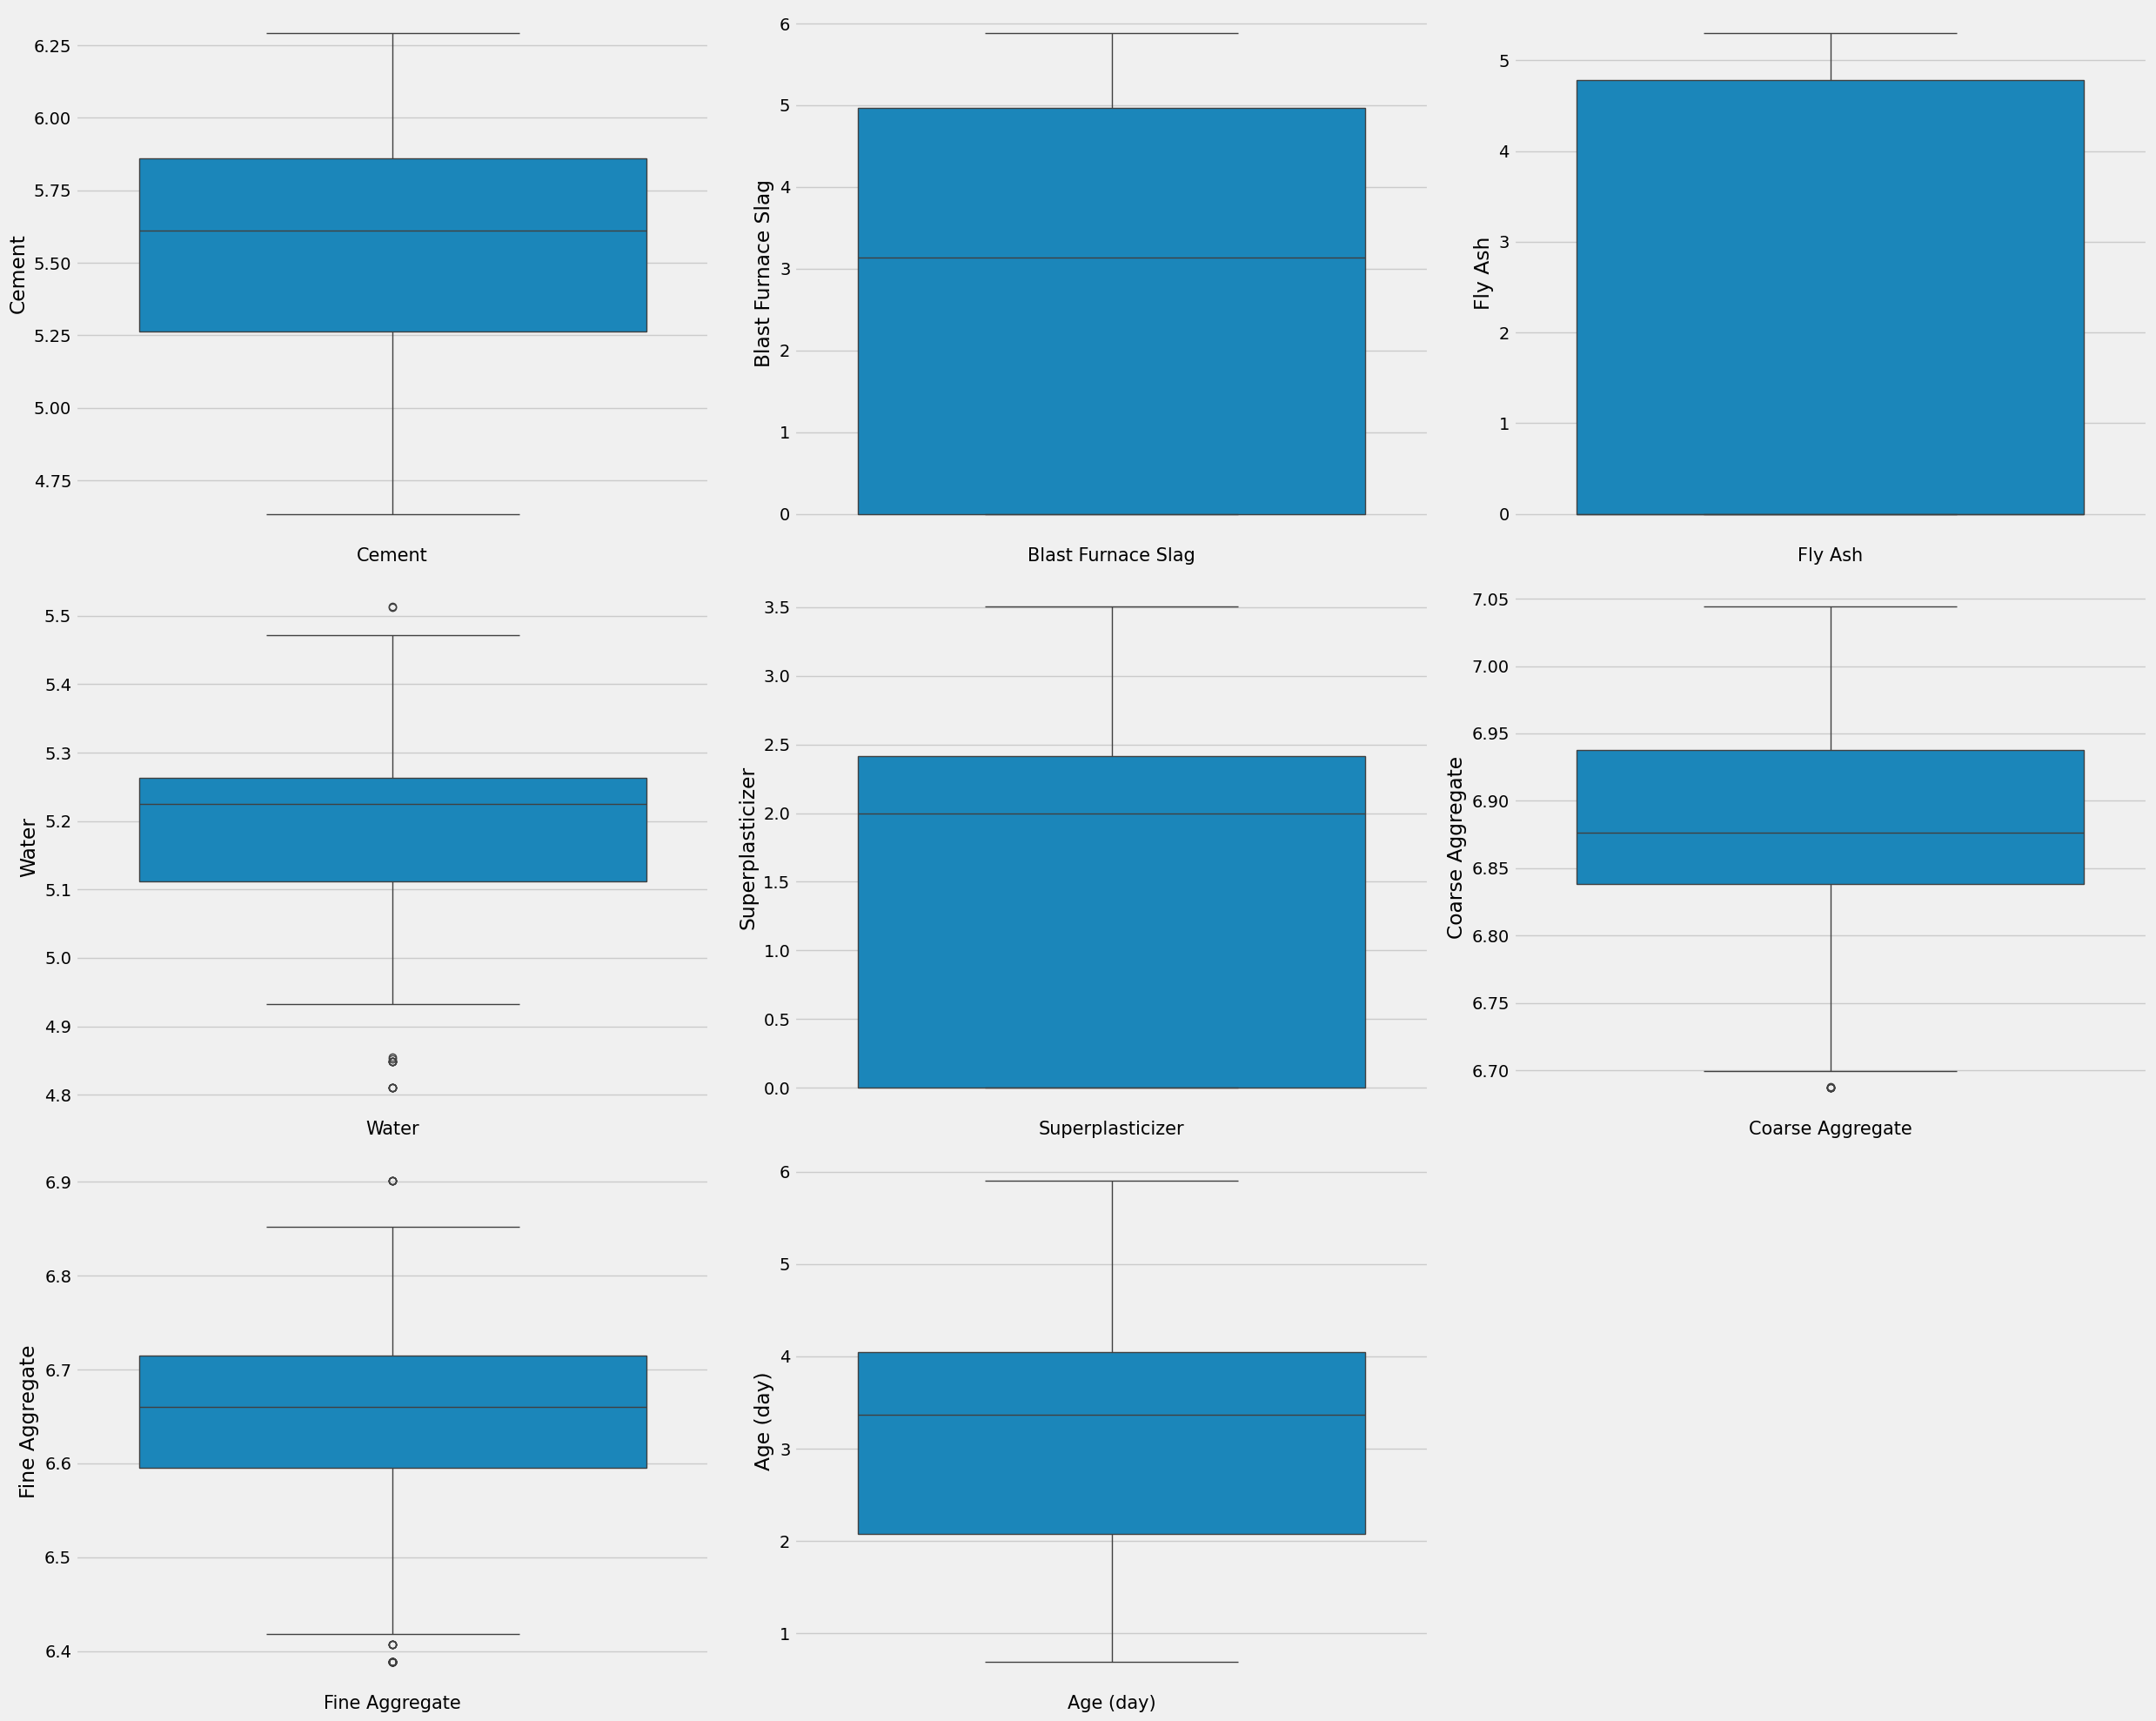

In [26]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in x.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()



In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# splitting data for training 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [29]:
# Scaling data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
lr.score(x_train, y_train)

0.801594499085746

In [32]:
lr.score(x_test, y_test)

0.8020727514573093

In [33]:
from sklearn.linear_model import Lasso, LassoCV

In [35]:
lassoCv = LassoCV(alphas = None, cv = 10, max_iter = 10000)
lassoCv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=10000)

In [36]:
lasso = Lasso(alpha=lassoCv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=0.13961959239073218)

In [37]:
lasso.score(x_train, y_train)

0.8010837036856946

In [38]:
lasso.score(x_test, y_test)

0.8024454332626411

In [40]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [41]:
dtr.score(x_train, y_train)

0.9973786827941303

In [42]:
dtr.score(x_test, y_test)

0.7935278858690586

In [39]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}



grid_search = GridSearchCV(dtr, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
0.8258603079637524


In [45]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter='random')

dtr.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=4, splitter='random')

In [46]:
dtr.score(x_train, y_train)

0.9586212977547961

In [47]:
dtr.score(x_test, y_test)

0.7358267594029684

In [48]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
rfr.score(x_train, y_train)

0.9851514314558226

In [50]:
rfr.score(x_test, y_test)

0.8869790437305102

In [51]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator=dtr)
ada.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       min_samples_split=4,
                                                       splitter='random'))

In [52]:
ada.score(x_train, y_train)

0.961432613917293

In [54]:
ada.score(x_test, y_test)

0.9960118034140616

In [55]:
grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                              max_depth=10,
                                                                              min_samples_split=4,
                                                                              splitter='random')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [40, 50, 80, 100]},
             verbose=1)

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 40}
0.8891671431116126


In [57]:
ada = AdaBoostRegressor(base_estimator = dtr, learning_rate = 0.5, loss = 'exponential', n_estimators = 40)
ada.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       min_samples_split=4,
                                                       splitter='random'),
                  learning_rate=0.5, loss='exponential', n_estimators=40)

In [58]:
ada.score(x_train, y_train)

0.9838853736463555

In [59]:
ada.score(x_test, y_test)

0.8715780675966145

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [61]:
gbr.score(x_train, y_train)

0.9495416843215961

In [62]:
gbr.score(x_test, y_test)

0.8880808202918022

In [63]:

grid_params = {
    'n_estimators': [90, 100, 120, 180, 200],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
    'loss' : ['ls', 'lad', 'huber', 'quantile']
}

grid_search = GridSearchCV(gbr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [90, 100, 120, 180, 200]},
             verbose=1)

In [64]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 200}
0.9095811502526419


In [65]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, loss = 'huber', n_estimators = 200)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(loss='huber', n_estimators=200)

In [66]:
gbr.score(x_train, y_train)

0.9641251437848751

In [67]:
gbr.score(x_test, y_test)

0.9189151009226479

In [69]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('AdaBoost', ada), ('Gradient Boost', gbr)]

vr = VotingRegressor(estimators=regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2, 0.2, 0.7))

vr.fit(x_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso', Lasso(alpha=0.13961959239073218)),
                            ('Decision Tree',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=10,
                                                   min_samples_split=4,
                                                   splitter='random')),
                            ('Random Forest', RandomForestRegressor()),
                            ('AdaBoost',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                                    max_depth=10,
                                                                                    min_samples_split=4,
                                                                                    splitter='random'),
                                               learning_rate=0.5,
                                               loss='exponential',
                                               n_estimators=40)),
                            ('Gradient Boost',
                             GradientBoostingRegressor(loss='huber',
                                                       n_estimators=200))],
                n_jobs=-1, verbose=1, weights=(0.1, 0.1, 0.1, 0.2, 0.2, 0.7))

In [70]:
vr.score(x_train, y_train)

0.9690760601567647

In [71]:
vr.score(x_test, y_test)

0.9096699297587915

In [73]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'Voting Regressor'],
    'Score' : [lr.score(x_test, y_test), lasso.score(x_test, y_test), dtr.score(x_test, y_test), rfr.score(x_test, y_test), ada.score(x_test, y_test), gbr.score(x_test, y_test), vr.score(x_test, y_test)]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
5,Gradient Boost,0.918915
6,Voting Regressor,0.909670
3,Random Forest,0.886979
4,AdaBoost,0.871578
1,Lasso,0.802445
0,Linear Regression,0.802073
2,Decision Tree,0.735827


<Axes: xlabel='Score', ylabel='Model'>

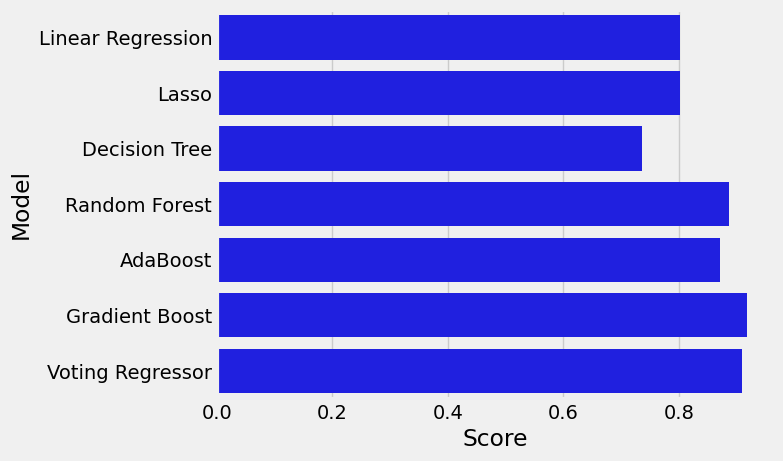

In [75]:
sns.barplot(x = 'Score', y = 'Model', data = models, color='b')